In [87]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import json
import os
import pandas as pd

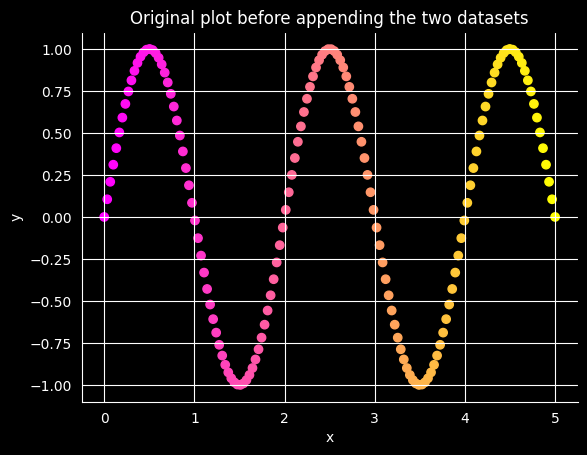

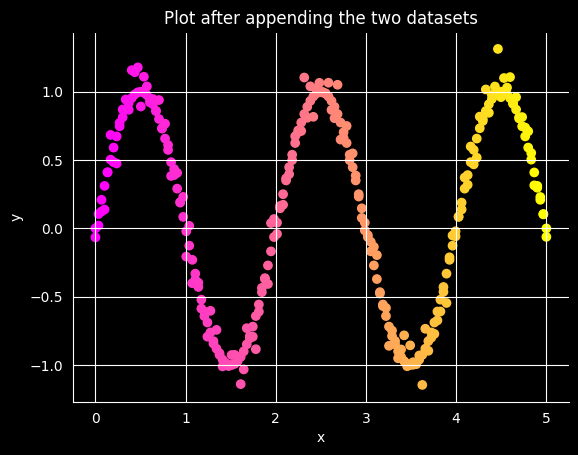

ValueError: DataFrame constructor not properly called!

In [94]:
class generate():
    ''' Initialization of the class '''
    def __init__(self, points, noise):
        self.points = points
        self.noise = np.random.randn(self.points)*noise
        self.x = np.linspace(0, 5, self.points)
        self.y = np.sin(np.pi*self.x)

    def generate_data(self):
        ''' Generate data with noise '''
        y = self.y + self.noise
        return y

    def plot(self):
        ''' Plot the data '''
        color = cm.spring(np.linspace(0, 1, self.points))
        plt.scatter(self.x, self.y, c=color)
        plt.title('Original plot before appending the two datasets', c='white')
        plt.xlabel('x', c='white')
        plt.ylabel('y', c='white')
        plt.gca().set_facecolor('black')
        plt.gcf().set_facecolor('black')
        plt.xticks(color='white')
        plt.yticks(color='white')
        ax = plt.gca()
        ax.spines['left'].set_color('white')
        ax.spines['bottom'].set_color('white')
        plt.grid(color='white')
        plt.savefig('../data/plot_1.png', dpi=200)
        plt.show()

    def data2d(self):
        ''' Creates two datasets in 2d.
            Here 'zip' pairs each value of x with each value of y'''
        xy = list(zip(self.x, self.y))
        xy_noise_truth = list(zip(self.x, self.generate_data()))
        return xy, xy_noise_truth
    
    def append(self):
        ''' Append the data '''
        xy, xy_noise_truth = self.data2d()
        appended_2d = np.append(xy, xy_noise_truth, axis=0)
        return appended_2d
    
    def plot_new_data(self):
        appended_2d = self.append()
        color = cm.spring(np.linspace(0, 1, self.points))
        plt.scatter(appended_2d[:150,0], appended_2d[:150,1], c=color)
        plt.scatter(appended_2d[150:,0], appended_2d[150:,1], c=color)
        plt.title('Plot after appending the two datasets', color='white')
        plt.xlabel('x', c='white')
        plt.ylabel('y', c='white')
        plt.gca().set_facecolor('black')
        plt.gcf().set_facecolor('black')
        plt.xticks(color='white')
        plt.yticks(color='white')
        ax = plt.gca()
        ax.spines['left'].set_color('white')
        ax.spines['bottom'].set_color('white')
        plt.grid(color='white')
        plt.savefig('../data/plot_2.png', dpi=200)
        plt.show()

    def save_metadata(self):
        appended_2d = self.append()
        metadata = {
                'plot': 'plot_2.png',
                'points': len(appended_2d),
                'noise': list(self.noise),
            }
        with open('../data/metadata_plot_2.json', 'w') as f:
            json.dump(metadata, f, indent=4)

        
    def create_txt_file(self):
        repositories = ['https://github.com/Mohamed-Hashem24/MOD550-Mohamed', 
                        'https://github.com/harry0703/MoneyPrinterTurbo', 
                        'https://github.com/stanford-oval/storm']
        
        comments = ['Sensible variable names has been used. The final class is well structured:', 
                    
                    'I have checked a few .py files and they seem to have used descriptive variable names, '
                    'but little to no comments in the code. '
                    'The README.md is written in both chinese and english - which is great for reaching a larger audience. '
                    'The folder structure is well organized:', 

                    'Many of the files includes helpful comments regarding class/functions functionality. '
                    'Filenames are descriptive and the folder structure is well organized. '
                    'A folder named "examples" is included, which is a great way to show how the code can be used.']
        
        repositories_comments = list(zip(repositories, comments))
        with open('../data/comment_on_repositories.txt', 'w') as f:
            for i in range(len(repositories_comments)):
                f.write('Repository:' +' '+ repositories_comments[i][0] + '\n' + 'Comment: ' + repositories_comments[i][1] + '\n\n')


    def clone_repository(self):
        if not os.path.exists('MOD550-Mohamed'):
            !git clone https://github.com/Mohamed-Hashem24/MOD550-Mohamed
        file = [f for f in os.listdir('MOD550-Mohamed') if f.endswith('.ipynb')]
        data = os.path.join('MOD550-Mohamed', file[0])
        d = pd.DataFrame(data)
        


data = generate(150, 0.1)

data.plot()

# xy, xy_noise_truth = data.data2d()

# xy = np.array(xy)
# xy_noise_truth = np.array(xy_noise_truth)

# appended_2d = data.append()


data.plot_new_data()
data.save_metadata()
data.create_txt_file()
data.clone_repository()
